In [6]:
import os
import glob
from pathlib import Path
import SimpleITK as sitk
# import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Visualizations of images

Applying Otsus method to: /data/batch/1.2.826.0.1.3680043.8.498.53088496500133281167989444834705286852/otsus-method/1.2.826.0.1.3680043.8.498.53088496500133281167989444834705286852.nrrd


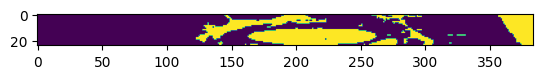

Applying Otsus method to: /data/batch/1.2.826.0.1.3680043.8.498.91917515864412399003586613247098892734/otsus-method/1.2.826.0.1.3680043.8.498.91917515864412399003586613247098892734.nrrd


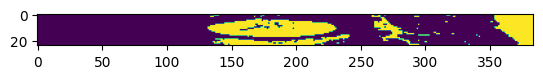

In [7]:
batch_folders = sorted([f for f in glob.glob(os.path.join('/', os.environ['WORKFLOW_DIR'], os.environ['BATCH_NAME'], '*'))])

for batch_element_dir in batch_folders:

    element_input_dir = os.path.join(batch_element_dir, os.environ['OPERATOR_IN_DIR'])
    element_output_dir = os.path.join(batch_element_dir, os.environ['OPERATOR_OUT_DIR'])

    if not os.path.exists(element_output_dir):
        os.makedirs(element_output_dir)


    nddr_files = sorted(glob.glob(os.path.join(element_input_dir, "*.nrrd"), recursive=True))

    if len(nddr_files) == 0:
        print("No nrrd file found!")
        exit(1)
    else:
        for file in nddr_files:
            print(("Applying Otsus method to: %s" % file))

            ### Load image
            img = sitk.ReadImage(file)

            z = img.GetSize()[2]
            nda = sitk.GetArrayFromImage(img)
            nda_slice = nda[:, :, int(z/2)]

            # display the slice
            plt.imshow(nda_slice)
            plt.show()
